### HW 02 Coding Assignment

Given a set of inputs X=[-1. -0.8 -0.6 -0.4 -0.2  0 0.2  0.4  0.6  0.8  1] and the corresponding outputs Y=[-5.4 -4.9 -4.5 -3.6 -2.7 -2.  -1.1 -0.1  0.1  1.1  1.5], find the linear regression function $y=ax+b$ according to the regularized least square method. That is, solve the following minimization problem
$$\min_{a,b}F(a,b)=\sum_{j=1}^{11} (ax_j +b - y_j)^2 + \mu (a^2+b^2),$$
where $\mu=0.1$.

1. Formulate it as a linear system and use linear solver in Python to find the exact solution $(a^*,b^*)$ and $F(a^*,b^*)$.

2. Use gradient descent method to find the approximate minimizer by using the following settings:

    + initial value $(a_0, b_0)=(0,0)$
    + use $(a_{k+1},b_{k+1})=(a_k,b_k) - \eta \nabla F(a_k,b_k)$ with learning rate $\eta=0.1$
    + run it for 200 times
    + store all the intermediate values of $a$, $b$, and $F(a,b)$. (There should be 200 for each of them)
    + output the final value of $a$, $b$, and $F(a,b)$
    + plot all the 200 values of $F(a,b)$. It should be a decreasing curve, that is, getting less and less and approaching the true value $F(a^*,b^*)$
    + compute the approximation error $e_k=\sqrt{(a_k-a^*)^2 + (b_k-b^*)^2}$ for each iteration $k$ and plot the error curve.
    
3. Consider using other stopping criterion (such as the difference between two consecutive iterations or the value of the gradient) instead of setting the total iteration counts.

4. Try to play with the learning rate $\eta$ to see the difference.

### Solution

1. Let $w = (a,b)^{T}$,

\begin{equation}
\mathbf{X}=
\begin{bmatrix}
ax_{1}+b-y_{1}\\
ax_{2}+b-y_{2}\\
\vdots\\
ax_{11}+b-y_{11}
\end{bmatrix}
=
\begin{bmatrix}
x_{1}&1\\
x_{2}&1\\
\vdots&1\\
x_{2}&1
\end{bmatrix}
\begin{bmatrix}
a\\
b
\end{bmatrix}
-
\begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{11}
\end{bmatrix}
\end{equation}

let

\begin{equation*}
    \mathbf{X}:=
    \begin{pmatrix}
    ax_{1}+b -y_{1}\\ 
    ax_{2}+b -y_{2}\\ 
    \vdots\\ 
    ax_{11}+b -y_{11}
    \end{pmatrix}
    \mathbf{A}:=
    \begin{pmatrix}
    x_{1}&1\\
    x_{2}&1\\
    \vdots&\vdots\\
    x_{11}&1
    \end{pmatrix}
    \mathbf{w}:=
    \begin{pmatrix}
     a\\
    b
    \end{pmatrix}
    \mathbf{y}:=
    \begin{pmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{11}
    \end{pmatrix}
\end{equation*}

we have
$$\mathbf{X} = \mathbf{Aw-Y}$$

Then
$$F(\mathbf{w}) = (\mathbf{Aw-Y})^{T}(\mathbf{Aw-Y})+\mu \mathbf(w^{T}w)$$
$$\nabla F (\mathbf{w}) = 2 \mathbf{A}^{T}(\mathbf{Aw-Y})+2\mu\mathbf{w}$$

solve $\nabla F(\mathbf{w}) = 0$, we can get $\mathbf{w} = (\mathbf{A^{T}A}+\mu)^{-1}\mathbf{A^{T}Y}$. Then we use linear solver in Python to find the exact solution $(a^*,b^*)$

In [1]:
import numpy as np
from numpy import linalg as LA

In [2]:
A = np.array([[-1,1],[-0.8,1],[-0.6,1],[-0.4,1],[-0.2,1],[0,1],[0.2,1],[0.4,1],[0.6,1],[0.8,1],[1,1]])
y = np.array([-5.4, -4.9, -4.5, -3.6, -2.7, -2., -1.1, -0.1, 0.1, 1.1, 1.5])

In [3]:
A

array([[-1. ,  1. ],
       [-0.8,  1. ],
       [-0.6,  1. ],
       [-0.4,  1. ],
       [-0.2,  1. ],
       [ 0. ,  1. ],
       [ 0.2,  1. ],
       [ 0.4,  1. ],
       [ 0.6,  1. ],
       [ 0.8,  1. ],
       [ 1. ,  1. ]])

In [4]:
w = LA.solve(np.dot(np.transpose(A),A)+0.1*np.eye(2),np.dot(np.transpose(A),y))
print(w)

[ 3.59555556 -1.94594595]


So that the exact solution is [ 3.59555556 -1.94594595], we can plot the figure.

In [5]:
import matplotlib.pyplot as plt
x = A[:,0]
plt.scatter(x,y)
X = np.linspace(-1,1,100)
Y = w[0]*X+w[1]
plt.plot(X,Y,color='red',linewidth=3.0)
plt.show()

<Figure size 640x480 with 1 Axes>

2. Use gradient descent to solve this problems

In [6]:
def f(a,b):
    N, f, mu = 11, 0, 0.1
    x = A[:,0]
    for i in range(N):
        f = f + np.power((a*x[i]+b-y[i]),2)
    f = f + mu*( a*a + b*b )
    return f

def df(a,b):
    N, mu = 11, 0.1
    df = np.zeros(2)
    x = A[:,0]
    for i in range(N):
        da = 2*(a*x[i]+b-y[i])*x[i]
        db = 2*(a*x[i]+b-y[i])
        df = df + np.array([da, db])
    df = df + np.array([2*mu*a, 2*mu*b])
    return df

err = lambda a,b,a0,b0 : np.sqrt(np.power((a-a0),2) + np.power((b-b0),2))

In [7]:
df(1,2)

array([-23.36,  87.6 ])

In [18]:
# gradient descent 
num_steps = 200   # num_steps is the no. of iteration
eta = 0.05        # learning rate, 0.1 is disconverge
a, b = 5,5        # initial data
a0, b0 = w        # true solution

# store all the intermediate values during the descents:
a_vals = np.zeros(num_steps)
b_vals = np.zeros(num_steps)
f_vals = np.zeros(num_steps)
err_vals = np.zeros(num_steps)

for j in range(num_steps):
    # update a and b
    (a,b) = np.array([a,b]) - eta * df(a,b)
    # store a, b, and f(a,b) 
    a_vals[j] = a
    b_vals[j] = b
    f_vals[j] = f(a,b)
    err_vals[j] = err(a,b,a0,b0)
    

Local minimum of f(a, b): 2.1514786786786786 at point (3.5955555555555563, -1.945945945945946)


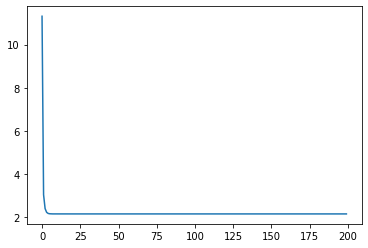

In [19]:
print("Local minimum of f(a, b):", f(a, b), "at point", (a, b))
# Let's see what the f(x,y) values were
plt.plot(range(num_steps), f_vals)
plt.show()

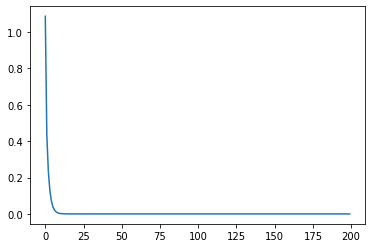

In [20]:
plt.plot(range(num_steps), err_vals)
plt.show()

3. use the norm of gradient of f to stop iterations. Given a $\varepsilon$, wants $\|\nabla f (a,b)\| < \varepsilon$

In [21]:
eta = 0.05        # learning rate, 0.1 is disconverge
a, b = 0,0        # initial data
a0, b0 = w        # true solution
epsilon = 0.01    # stop crition 

# store all the intermediate values during the descents:
a_vals = []
b_vals = []
f_vals = []
err_vals = []
k = 0       # compute the number of iteration
while LA.norm(df(a,b)) > epsilon:
    # update a and b
    (a,b) = np.array([a,b]) - eta * df(a,b)
    # store a, b, and f(a,b) 
    a_vals.append(a)
    b_vals.append(b)
    f_vals.append(f(a,b))
    err_vals.append(err(a,b,a0,b0))
    k = k+1

the number of iteration is  14
Local minimum of f(a, b): 2.1514818040370742 at point (3.5947221744374764, -1.9459459459458721)


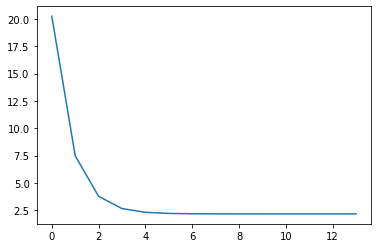

In [22]:
print("the number of iteration is ", k)
print("Local minimum of f(a, b):", f(a, b), "at point", (a, b))
# Let's see what the f(x,y) values were
plt.plot(range(k), f_vals)
plt.show()

In [25]:
x = np.arange(-1000,1000)* 0.01

In [ ]:
np.log(sigma(x))